# Information About Dataset

This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

## **LOADING OF DATASET**
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving covtype.csv to covtype.csv


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.data import Dataset
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers


Using TensorFlow backend.


In [0]:
import seaborn as sns

In [0]:
import sklearn
from sklearn.preprocessing import StandardScaler


In [8]:
df=pd.read_csv('covtype.csv',index_col=0)

FileNotFoundError: ignored

# Data Statistics

In [0]:
df.head()

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2596,51,3,258,0,510,221,232,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2590,56,2,212,-6,390,220,235,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2804,139,9,268,65,3180,234,238,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2785,155,18,242,118,3090,238,238,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2595,45,2,153,-1,391,220,234,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [0]:
df.info()
# We can see all columns have diffrent data types , float64(47), int64(7).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154340 entries, 2596 to 2965
Data columns (total 54 columns):
Aspect                                154340 non-null int64
Slope                                 154340 non-null int64
Horizontal_Distance_To_Hydrology      154340 non-null int64
Vertical_Distance_To_Hydrology        154340 non-null int64
Horizontal_Distance_To_Roadways       154340 non-null int64
Hillshade_9am                         154340 non-null int64
Hillshade_Noon                        154340 non-null int64
Hillshade_3pm                         154339 non-null float64
Horizontal_Distance_To_Fire_Points    154339 non-null float64
Wilderness_Area1                      154339 non-null float64
Wilderness_Area2                      154339 non-null float64
Wilderness_Area3                      154339 non-null float64
Wilderness_Area4                      154339 non-null float64
Soil_Type1                            154339 non-null float64
Soil_Type2                        

*No Misssing values are presents*

In [0]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,154340.000000,154340.000000,154340.000000,154340.000000,154340.000000,154340.000000,154340.000000,154340.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.0,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000,154339.000000
mean,2879.424563,141.530465,11.875528,252.353609,34.434729,3349.974142,217.373396,224.964740,139.921459,2977.954606,0.925340,0.003233,0.041137,0.030290,0.002300,0.004037,0.006233,0.005462,0.001069,0.004212,0.000680,0.001160,0.007432,0.013879,0.002631,0.192388,0.003084,0.001095,0.0,0.014377,0.003965,0.011851,0.007795,0.039802,0.000104,0.006434,0.074894,0.014053,0.000006,0.000350,0.000097,0.000058,0.427598,0.122944,0.002151,0.004471,0.003991,0.000143,0.000680,0.000065,0.000220,0.005203,0.007840,0.005248,2.004633
std,208.645556,107.854675,6.272903,191.997174,40.924465,1682.140836,21.523197,15.991239,31.353867,1745.047791,0.262843,0.056769,0.198607,0.171386,0.047905,0.063406,0.078703,0.073703,0.032679,0.064760,0.026074,0.034036,0.085887,0.116987,0.051222,0.394178,0.055449,0.033073,0.0,0.119041,0.062846,0.108214,0.087942,0.195494,0.010181,0.079953,0.263220,0.117712,0.002545,0.018702,0.009858,0.007636,0.494732,0.328374,0.046330,0.066714,0.063050,0.011938,0.026074,0.008049,0.014841,0.071943,0.088196,0.072254,1.022590
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2753.000000,55.000000,7.000000,95.000000,7.000000,1899.000000,207.000000,216.000000,121.000000,1574.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2913.000000,108.000000,11.000000,212.000000,23.000000,3461.000000,222.000000,227.000000,140.000000,2630.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

**SHAPE**

In [0]:
print(df.shape)

# We can see that there are 154340 instances having 55 attributes

(154340, 55)


In [0]:
# Statistical description

pd.set_option('display.max_columns', None)
print(df.describe())

# Learning :
# No attribute is missing as count is 154340 for all attributes. Hence, all rows can be used
# Negative value(s) present in Vertical_Distance_To_Hydrology. Hence, some tests such as chi-sq cant be used.
# Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis
# Attributes Soil_Type7 and Soil_Type15 can be removed as they are constant
# Scales are not the same for all. Hence, rescaling and standardization may be necessary for some algos

           Elevation         Aspect          Slope  \
count  154340.000000  154340.000000  154340.000000   
mean     2879.424563     141.530465      11.875528   
std       208.645556     107.854675       6.272903   
min      1863.000000       0.000000       0.000000   
25%      2753.000000      55.000000       7.000000   
50%      2913.000000     108.000000      11.000000   
75%      3008.000000     219.000000      15.000000   
max      3849.000000     360.000000      61.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     154340.000000                   154340.000000   
mean                         252.353609                       34.434729   
std                          191.997174                       40.924465   
min                            0.000000                     -146.000000   
25%                           95.000000                        7.000000   
50%                          212.000000                       2

**SKEWNESS**

In [0]:
# Skewness of the distribution

print(df.skew())

# Values close to 0 show less skew
# Several attributes in Soil_Type show a large skew. Hence, some algos may benefit if skew is corrected

Elevation                              -0.687548
Aspect                                  0.684513
Slope                                   0.929407
Horizontal_Distance_To_Hydrology        0.974922
Vertical_Distance_To_Hydrology          1.785873
Horizontal_Distance_To_Roadways        -0.082232
Hillshade_9am                          -1.266509
Hillshade_Noon                         -0.948702
Hillshade_3pm                          -0.150708
Horizontal_Distance_To_Fire_Points      0.428361
Wilderness_Area1                       -3.236492
Wilderness_Area2                       17.501594
Wilderness_Area3                        4.620876
Wilderness_Area4                        5.481379
Soil_Type1                             20.779039
Soil_Type2                             15.644295
Soil_Type3                             12.547704
Soil_Type4                             13.419837
Soil_Type5                             30.535341
Soil_Type6                             15.311871
Soil_Type7          


**Class Distribution**




In [0]:
# Number of instances belonging to each class

df.groupby('Cover_Type').size()

# We see that all classes not have an equal presence. So, class re-balancing is necessary

Cover_Type
1.0     34412
2.0    108218
3.0      2160
4.0      2160
5.0      3069
6.0      2160
7.0      2160
dtype: int64

#Explorartory Data Analysis

In [0]:
import matplotlib.pyplot as plt

**DATA INTERGRATION**


1. Scatter Plot




* The plots show to which class does a point belong to. The class distribution overlaps in the plots.  

* Hillshade patterns give a nice ellipsoid patterns with each other

* Aspect and Hillshades attributes form a sigmoid pattern

* Horizontal and vertical distance to hydrology give an almost linear pattern. 

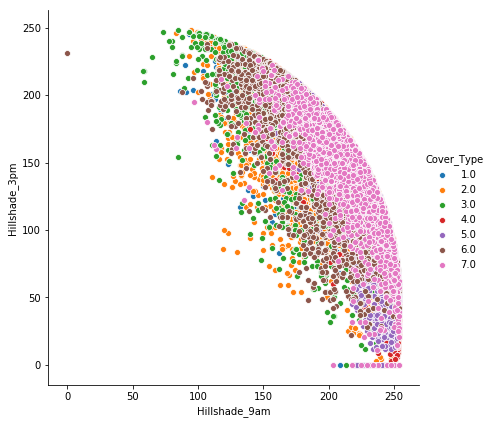

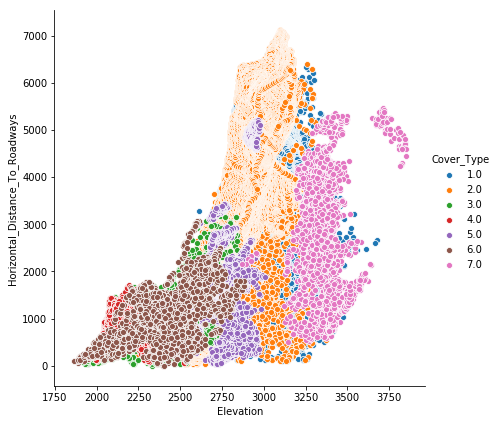

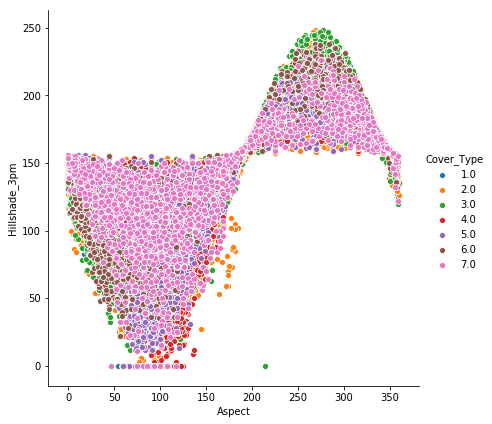

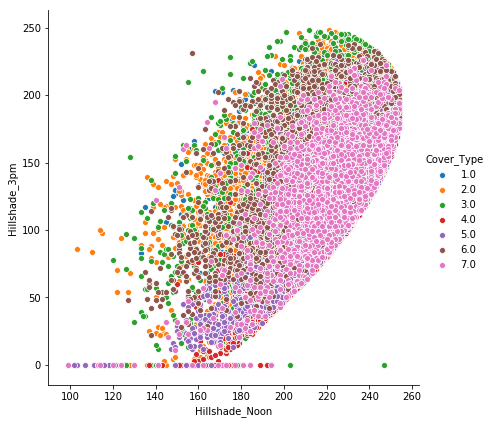

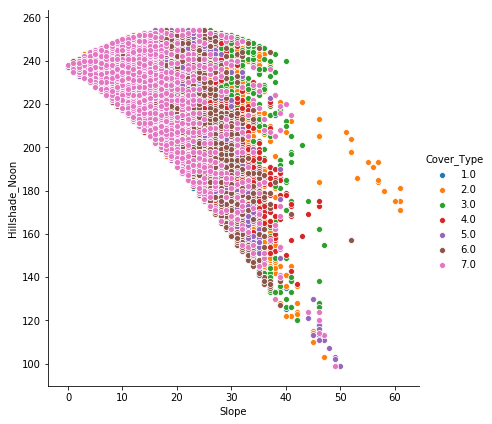

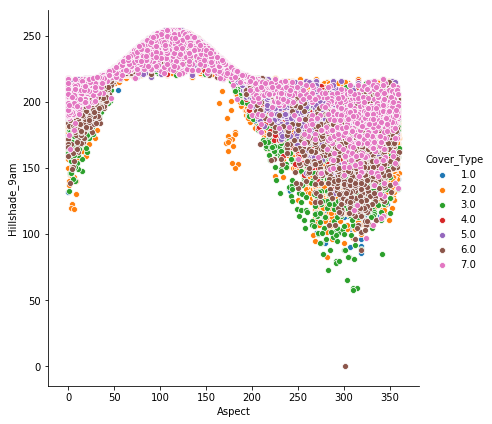

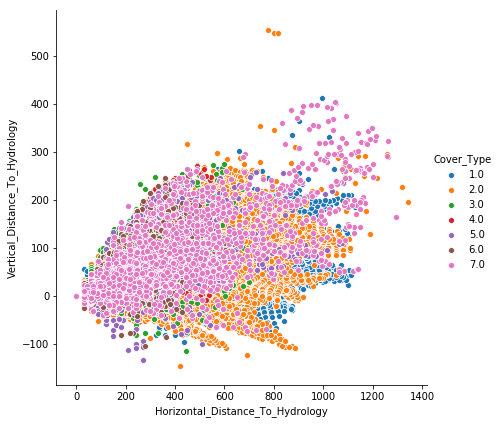

In [0]:
for v,i,j in s_corr_list:
    sns.pairplot(df, hue="Cover_Type", height=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()



2) Correlation

* Correlation tells relation between two attributes.
* Correlation requires continous data. Hence, ignore Wilderness_Area and Soil_Type as they are binary

In [1]:
import numpy



#sets the number of features considered
size = 10 

#create a dataframe with only 'size' features
data=df.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

NameError: ignored

**DATA VISUALIZATION**



*   HEAT MAP
*   BOX PLOT
*   PAIR PLOT



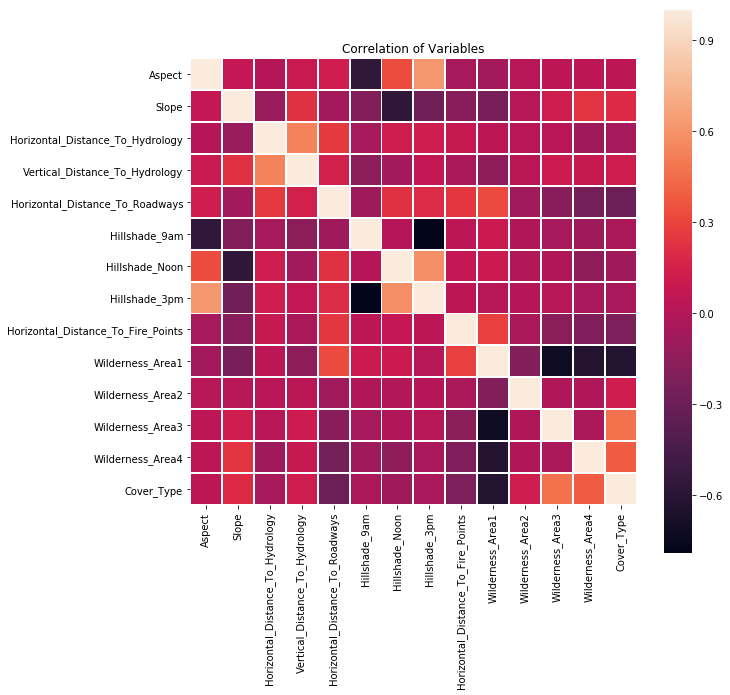

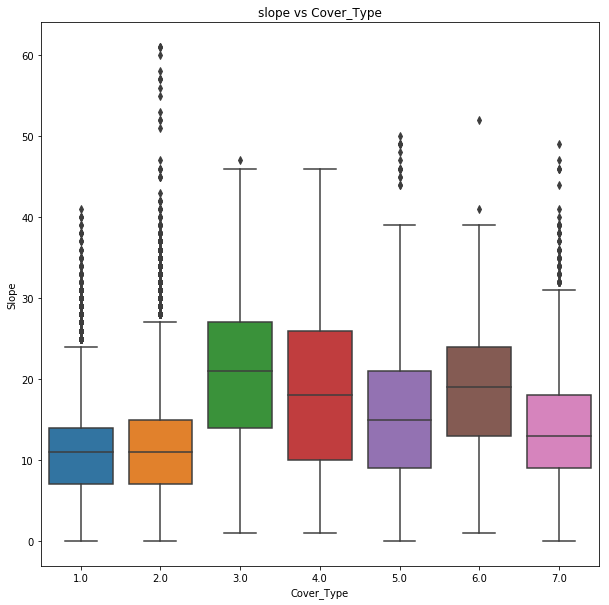

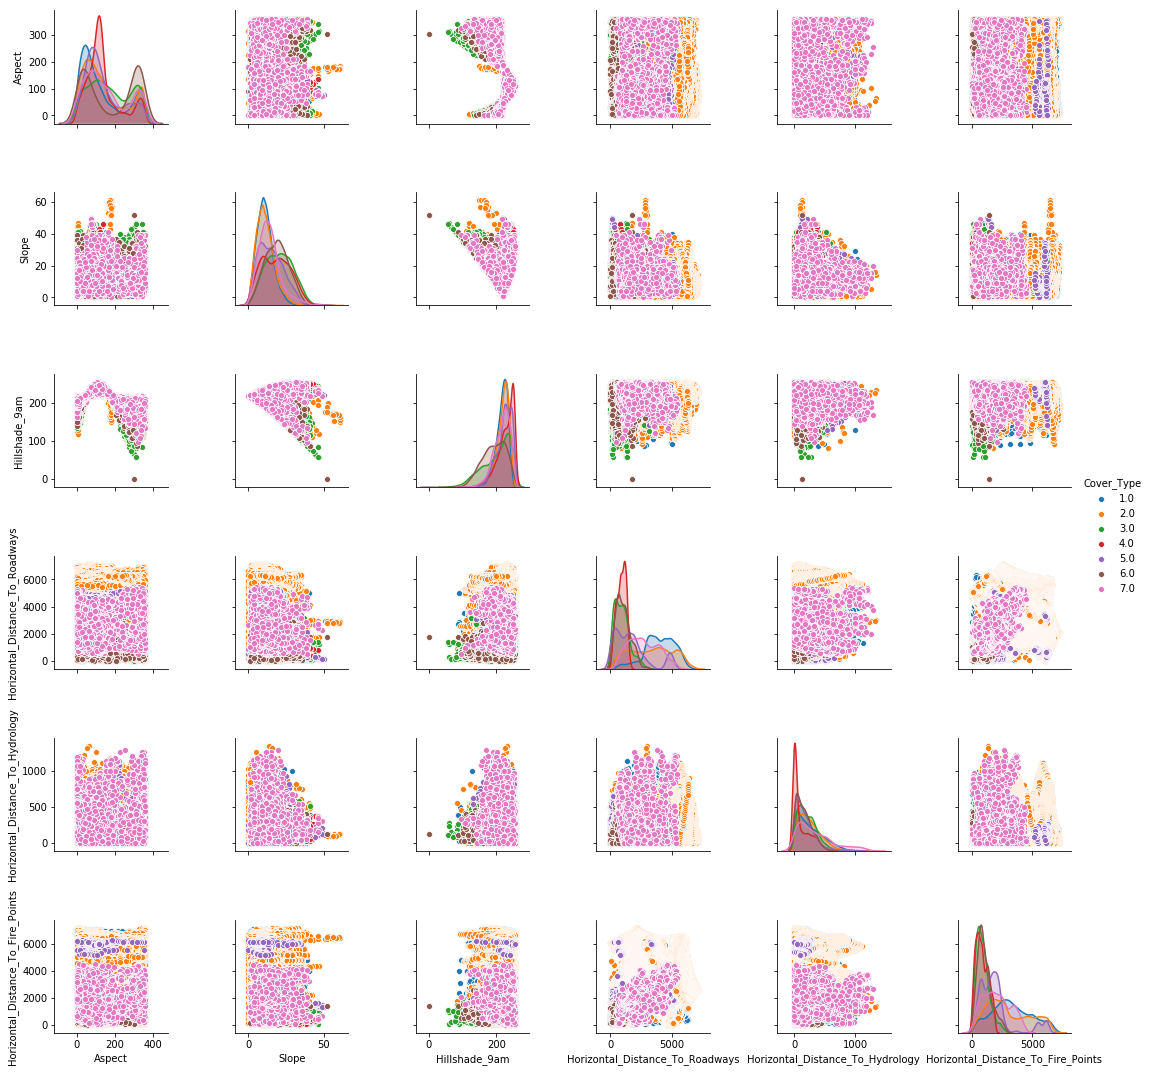

In [0]:
col_list = df.columns
col_list = [col for col in col_list if not col[0:4]=='Soil']
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df[col_list].corr(),square=True,linewidths=1)
plt.title('Correlation of Variables')

plt.figure(figsize=(10,10))
sns.boxplot(y='Slope',x='Cover_Type', data= df )
plt.title('slope vs Cover_Type')


sns.pairplot( df, hue='Cover_Type',vars=['Aspect','Slope','Hillshade_9am','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points'],diag_kind="kde")
plt.show()

**LM PLOT**

*   Horizontal_Distance_To_Hydrology & Vertical_Distance_To_Hydrology with Soil_Type2
*  Horizontal_Distance_To_Hydrology & Vertical_Distance_To_Hydrologywith Wilderness_Area1



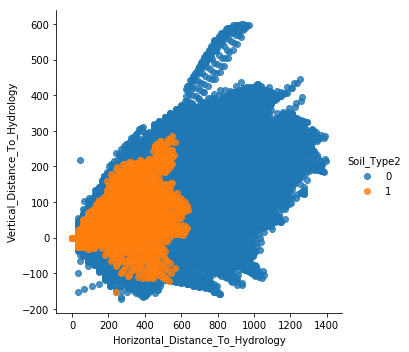

In [0]:

sns.lmplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', data=df, hue='Soil_Type2',fit_reg=False)

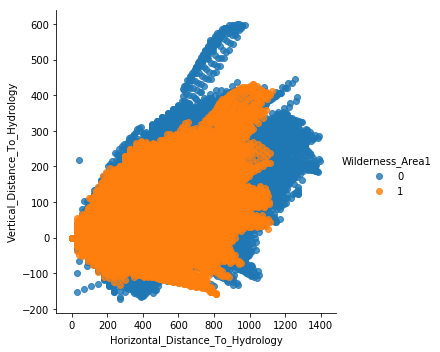

In [0]:
sns.lmplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', data=df, hue='Wilderness_Area1',fit_reg=False)

We will visualize all the attributes using Violin Plot - a combination of box and density plots

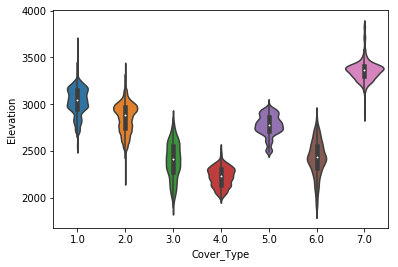

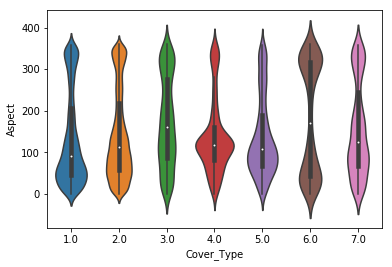

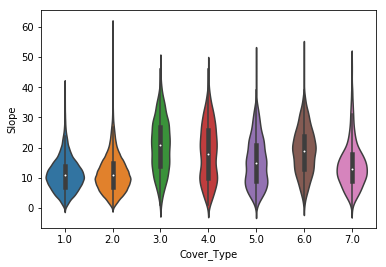

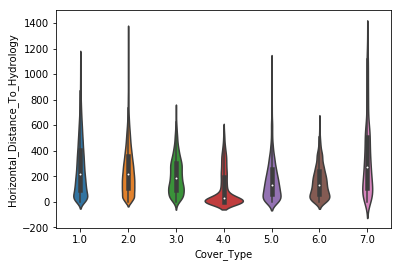

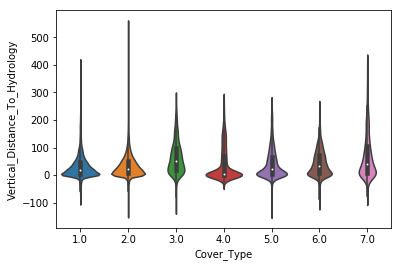

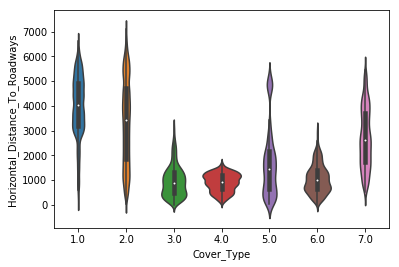

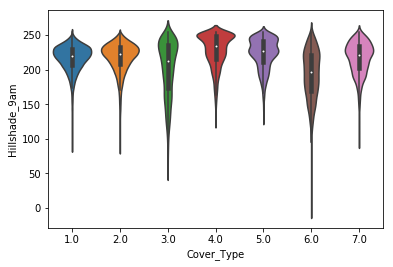

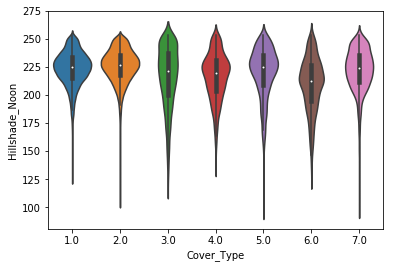

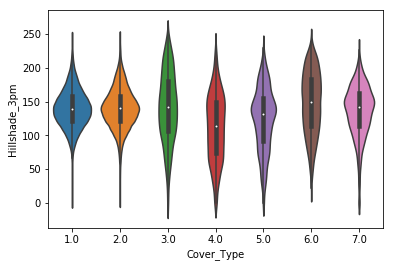

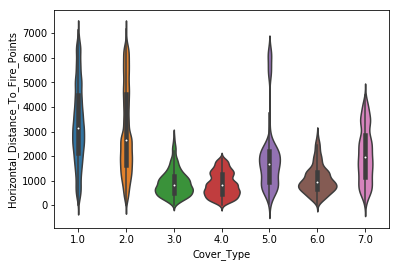

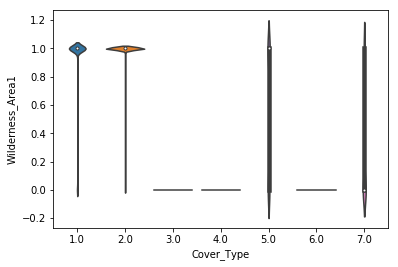

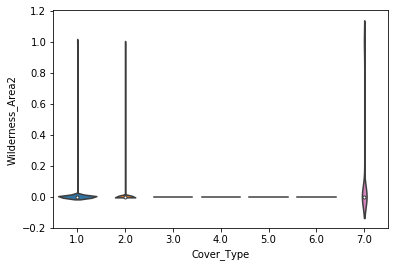

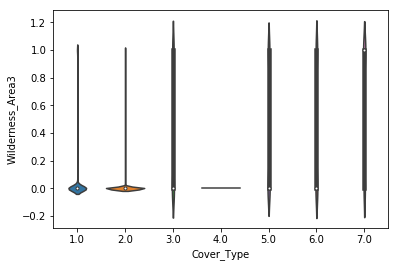

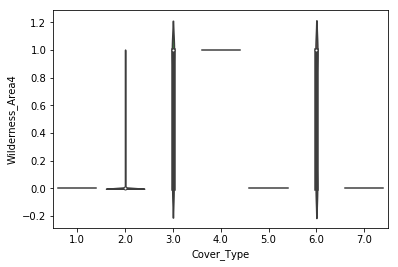

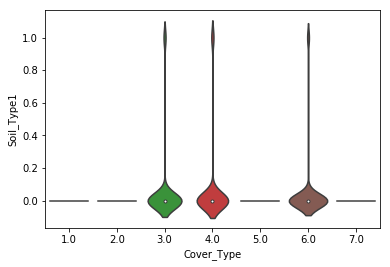

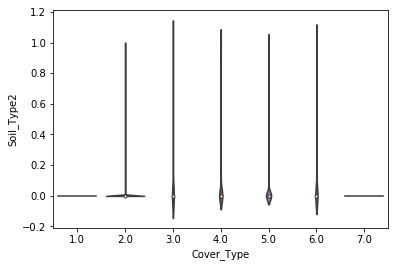

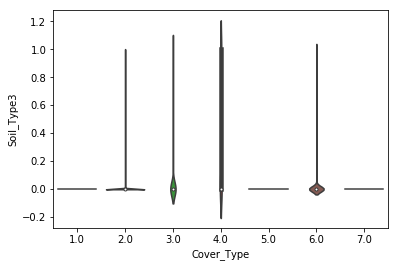

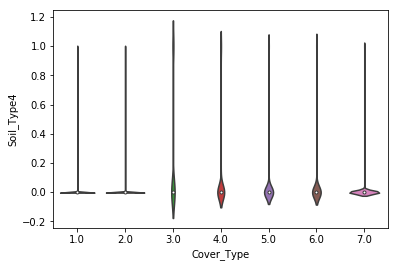

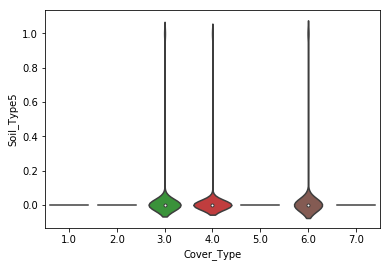

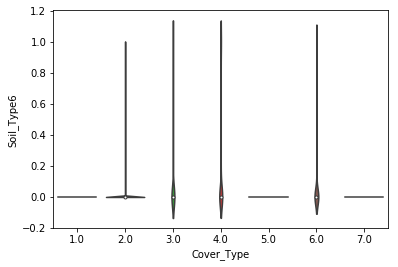

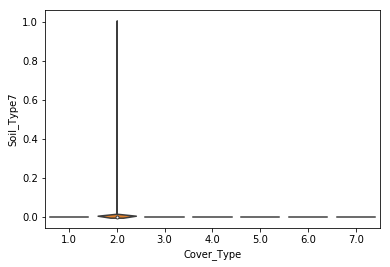

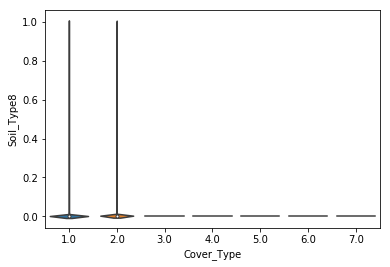

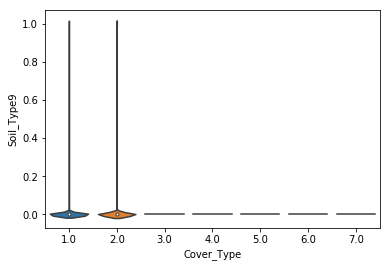

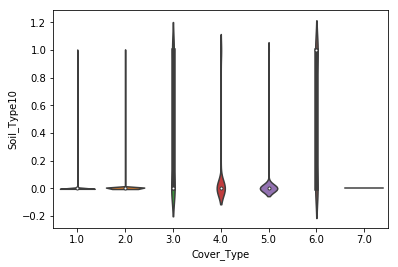

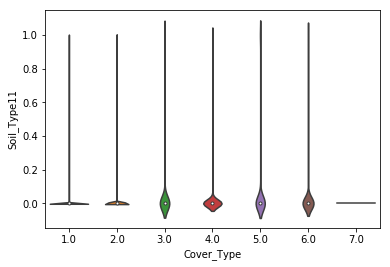

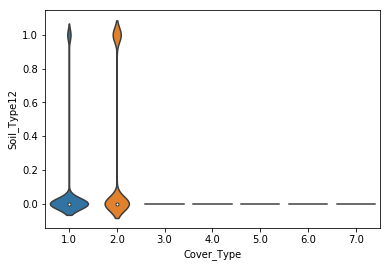

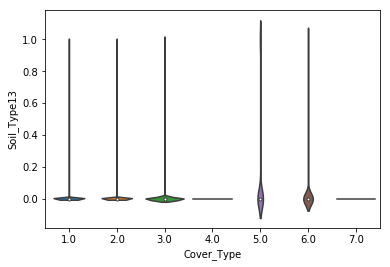

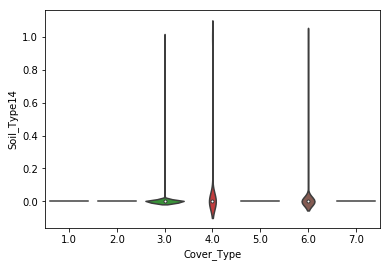

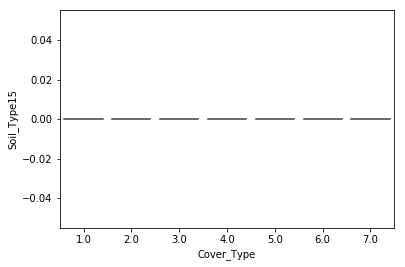

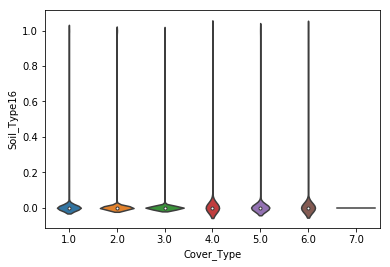

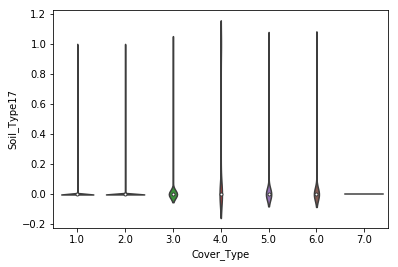

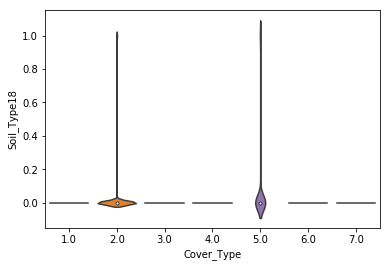

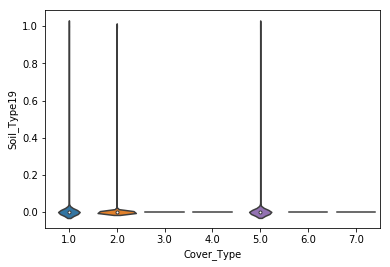

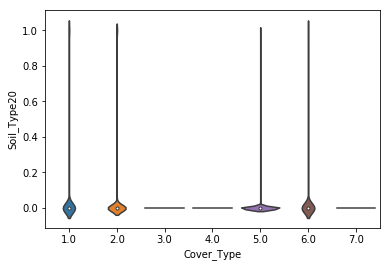

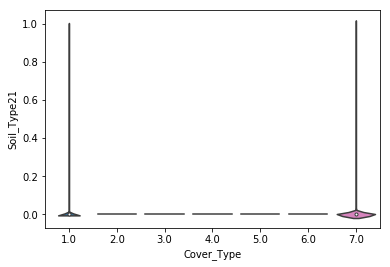

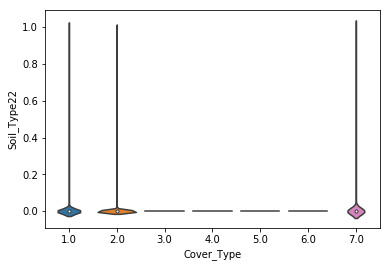

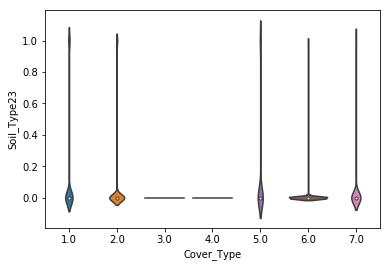

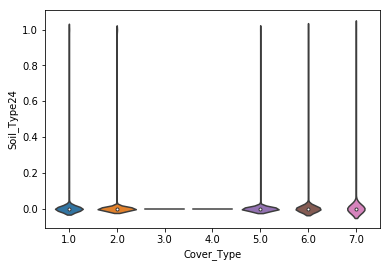

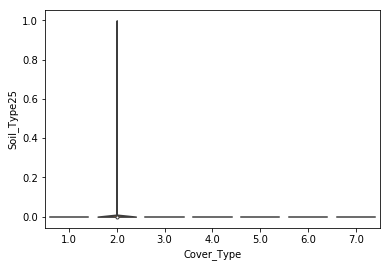

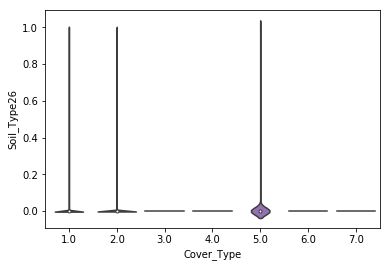

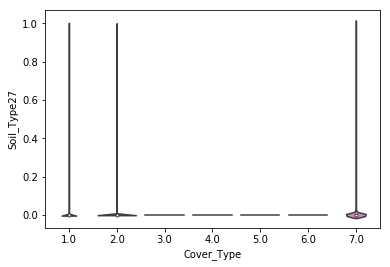

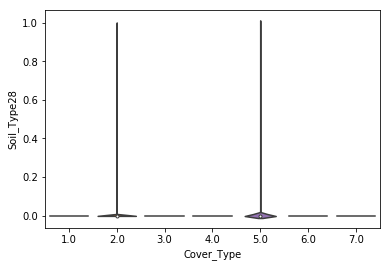

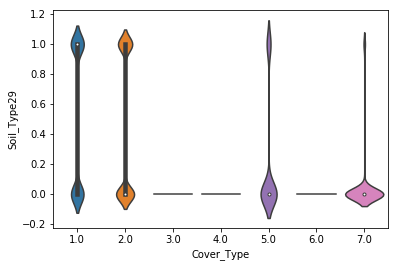

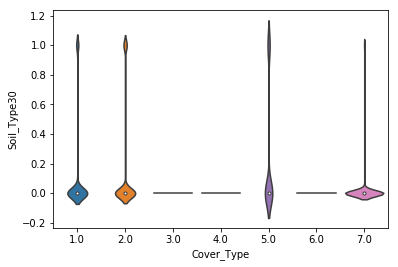

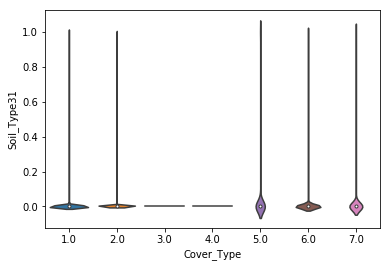

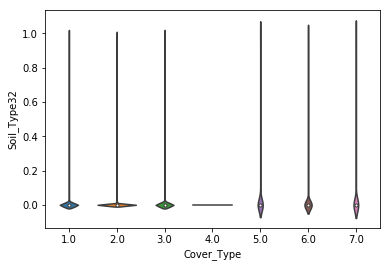

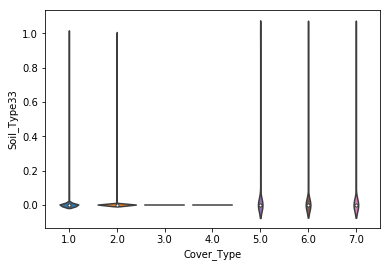

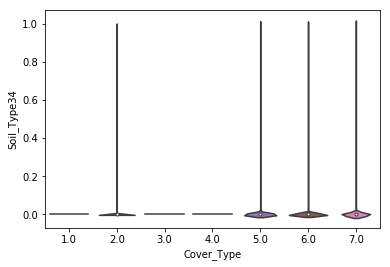

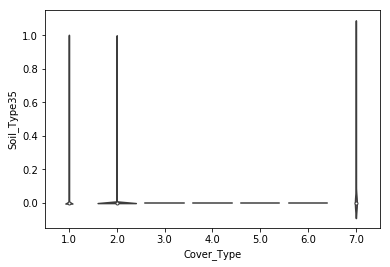

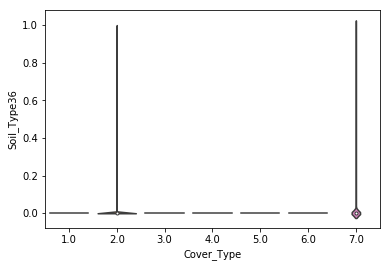

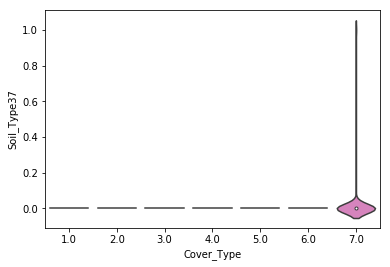

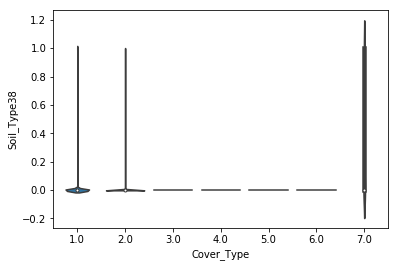

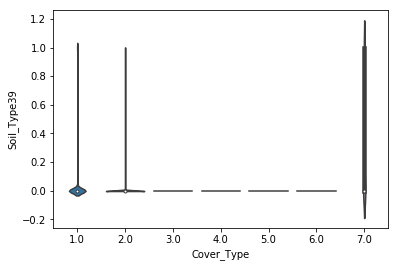

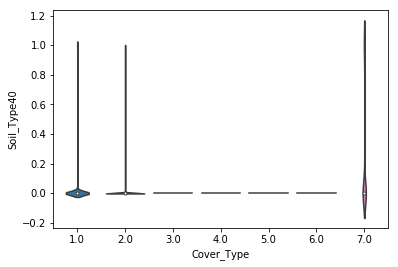

In [0]:


#names of all the attributes 
cols = df.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=df,x=x,y=y[i])  
    plt.show()

#Elevation is has a separate distribution for most classes. Highly correlated with the target and hence an important attribute
#Aspect contains a couple of normal distribution for several classes
#Horizontal distance to road and hydrology have similar distribution
#Hillshade 9am and 12pm display left skew
#Hillshade 3pm is normal
#Lots of 0s in vertical distance to hydrology
#Wilderness_Area3 gives no class distinction. As values are not present, others gives some scope to distinguish
#Soil_Type, 1,5,8,9,12,14,18-22, 25-30 and 35-40 offer class distinction as values are not present for many classes

In [0]:
#Removal list initialize
rem = []

#Add constant columns as they don't help in prediction process
for c in df.columns:
    if df[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
df.drop(rem,axis=1,inplace=True)

print(rem)

['Soil_Type15']


* Grouping of One hot encoded attributes
    - Group one-hot encoded variables of a category into one single variable

In [0]:
import pandas as pd

In [0]:


#names of all the columns
cols = df.shape
#number of rows=r , number of columns=c
r,c = df.shape


#Create a new dataframe with r rows, one column for each encoded category, and target in the end
data = pd.DataFrame(index=numpy.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

#Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w=0;
    s=0;
    # Category1 range
    for j in range(10,14):
        if (df.iloc[i,j] == 1):
            w=j-9  #category class
            break
    # Category2 range        
    for k in range(14,54):
        if (df.iloc[i,k] == 1):
            s=k-13 #category class
            break
    #Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i]=[w,s,df.iloc[i,c-1]]

#Plot for Category1    
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.show()
#Plot for Category2
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.show()

#(right-click and open the image in a new window for larger size)
#WildernessArea_4 has a lot of presence for cover_type 4. Good class distinction
#WildernessArea_3 has not much class distinction
#SoilType 1-6,10-14,17, 22-23, 29-33,35,38-40 offer lot of class distinction as counts for some are very high

KeyboardInterrupt: ignored

# Normalizing DataSet

In [0]:
from sklearn import preprocessing
df = pd.read_csv('covtype.csv')
x = df[df.columns[:55]]
y = df.Cover_Type
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)

*Select numerical columns which needs to be normalized*

In [0]:

train_norm = x_train[x_train.columns[0:10]]
test_norm = x_test[x_test.columns[0:10]]


*Normalize Training Data*



In [0]:
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)


Converting numpy array to dataframe

In [0]:
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


        Elevation    Aspect     Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
79423    0.442009 -0.142131 -0.935945  ...          0.0          0.0         2.0
76554   -1.314846 -0.299797 -0.457631  ...          0.0          0.0         2.0
10008    0.159572 -0.819169 -0.138755  ...          0.0          0.0         2.0
59378    0.489880  1.230495 -0.298193  ...          0.0          0.0         2.0
144542  -1.415375 -1.292169 -0.776507  ...          0.0          0.0         2.0

[5 rows x 55 columns]


 Normalize Testing Data by using mean and SD of training set

In [0]:
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


        Elevation    Aspect     Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
79423    0.442009 -0.142131 -0.935945  ...          0.0          0.0         2.0
76554   -1.314846 -0.299797 -0.457631  ...          0.0          0.0         2.0
10008    0.159572 -0.819169 -0.138755  ...          0.0          0.0         2.0
59378    0.489880  1.230495 -0.298193  ...          0.0          0.0         2.0
144542  -1.415375 -1.292169 -0.776507  ...          0.0          0.0         2.0

[5 rows x 55 columns]


As y variable is multi class categorical variable, hence using softmax as activation function and sparse-categorical cross entropy as loss function.

***Validating Data Through Relu Function***

In [0]:
model = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(64, activation=tf.nn.relu),
 keras.layers.Dense(8, activation=  'softmax')
 ])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(
 x_train, y_train,
 epochs= 26, batch_size = 60,
 validation_data = (x_test, y_test))

Train on 108038 samples, validate on 46302 samples
Epoch 1/26
 86280/108038 [======================>.......] - ETA: 0s - loss: 0.1156 - acc: 0.9679

InvalidArgumentError: ignored

**Visualize Training History**

In [0]:

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
history = model.fit(x_train, y_train, nb_epoch=10, validation_split=0.7, shuffle=True)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 32411 samples, validate on 75627 samples
Epoch 1/10
 3200/32411 [=>............................] - ETA: 1s - loss: 0.0103 - acc: 0.9978

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


32064/32411 [============================>.] - ETA: 0s - loss: 0.0104 - acc: 0.9966

InvalidArgumentError: ignored

# sigmoid

In [0]:
import numpy as np

In [0]:
df = pd.read_csv('covtype.csv')

In [0]:
df_list = df[['Aspect',                 
'Slope',                               
'Horizontal_Distance_To_Hydrology' ,   
'Vertical_Distance_To_Hydrology',        
'Horizontal_Distance_To_Roadways',       
'Hillshade_9am' ,                     
'Hillshade_Noon',                        
'Hillshade_3pm' ,                        
'Horizontal_Distance_To_Fire_Points',   
'Wilderness_Area1' ,                     
'Wilderness_Area2',                      
'Wilderness_Area3' ,                     
'Wilderness_Area4' ,                    
'Soil_Type1'  ,                        
'Soil_Type2',                            
'Soil_Type3' ,                           
'Soil_Type4' ,                          
'Soil_Type5',                            
'Soil_Type6' ,                          
'Soil_Type7' ,                           
'Soil_Type8'  ,                          
'Soil_Type9'  ,                          
'Soil_Type10' ,                          
'Soil_Type11' ,                          
'Soil_Type12' ,                          
'Soil_Type13',                           
'Soil_Type14' ,                         
'Soil_Type15' ,                          
'Soil_Type16' ,                         
'Soil_Type17' ,                          
'Soil_Type18' ,                         
'Soil_Type19' ,                          
'Soil_Type20',                           
'Soil_Type21',                          
'Soil_Type22',                           
'Soil_Type23',                          
'Soil_Type24',                           
'Soil_Type25',                          
'Soil_Type26' ,                         
'Soil_Type27',                           
'Soil_Type28',                           
'Soil_Type29' ,                          
'Soil_Type30',                         
'Soil_Type31' ,                          
'Soil_Type32',                           
'Soil_Type33',                         
'Soil_Type34',                        
'Soil_Type35' ,                         
'Soil_Type36' ,                          
'Soil_Type37' ,                          
'Soil_Type38' ,                       
'Soil_Type39' ,                       
'Soil_Type40']]
df_list1 = df[['Cover_Type']]

In [0]:
X = np.array((df_list), dtype=float)
y = np.array((df_list1), dtype=float)

In [0]:
X = X/np.max(X,axis=0)
y = y/np.max(y,axis=0)

In [0]:
class NeuralNetwork(object):
    def __init__(self):
        #parameters
        self.inputSize = 16
        self.outputSize = 1
        self.hiddenSize = 45
        
        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) 
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize)
        
    def feedForward(self, X):
        self.z = np.dot(X, self.W1) 
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.dot(self.z2, self.W2)
        output = self.sigmoid(self.z3)
        return output
        
    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def backward(self, X, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
        
        self.z2_error = self.output_delta.dot(self.W2.T) 
        self.z2_delta = self.z2_error * self.sigmoid(self.z2, deriv=True) 
        
        self.W1 += X.T.dot(self.z2_delta) 
        self.W2 += self.z2.T.dot(self.output_delta)
        
    def train(self, X, y):
        output = self.feedForward(X)
        self.backward(X, y, output)
        
NN = NeuralNetwork()

for i in range(1000):
    NN.train(X, y)
        
print(NN.feedForward(X[0:20]))

ValueError: ignored